In [1]:
import os
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt
from scipy.spatial import distance

In [5]:
import gudhi, gudhi.hera, gudhi.wasserstein
import persim

In [6]:
import plotly
from plotly.graph_objs import graph_objs as go
import ipywidgets as widgets
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot

In [7]:

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

In [5]:
dat=np.load(open('Ptraj0.npy',"rb"))
skel=pickle.load(open("skelSort.pkl","rb"))
skel=skel[len(dat):]


In [5]:
dat=np.load(open('Ptraj42.npy',"rb"))
skel=pickle.load(open("skelSort42.pkl","rb"))

In [5]:
datF=np.load(open('Ptraj50.npy',"rb"))
dat=datF

In [6]:
skel[:10]

[([44, 45], 0.018862040985368367),
 ([2433, 2434], 0.01899864694610187),
 ([2264, 2265], 0.01900019155186783),
 ([909, 910], 0.019288726502054487),
 ([2356, 2357], 0.019508601627649114),
 ([787, 788], 0.019560535575919857),
 ([1126, 1127], 0.01980728914645624),
 ([1687, 1688], 0.019938487934496152),
 ([1528, 1529], 0.019996236477027196),
 ([1971, 1972], 0.020131333732933854)]

In [6]:
ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()
skel=list(st.get_skeleton(2))
skel.sort(key=lambda s: s[1])
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
dat=points

In [13]:
dat=points

In [ ]:
dat[767]-dat[2543]

In [11]:
fig=go.Figure(
    data=[go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=1.75,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)]
)
fig.show()

In [7]:
alpha=.02
b1s=[np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha])]
triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha])


pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s[0]:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])

    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
#for i in range(3):
#        linepts[i]=np.array(linepts[i])


if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = dat[:, 0],
            y = dat[:, 1],
            z = dat[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig,layout=go.Layout(
    width=1000,height=1000
    ,
))

fig.show()


In [ ]:
dat[7]-dat[848]

In [8]:
lims=[[np.floor(np.min(dat[:,i])),np.ceil(np.max(dat[:,i]))] for i in range(3)]
alpha = widgets.FloatSlider(
    value = 0.05,
    min = 0.0,
    max = 20,
    step = 0.25,
    description = 'Alpha:',
    readout_format = '.4f'
)



b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha.value])
triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha.value])


pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'
    
)

sfig=[pts]

linepts={0:[],1:[],2:[]}
for i in b1s:
    linepts[0].append(dat[i[0],0])
    linepts[1].append(dat[i[0],1])
    linepts[2].append(dat[i[0],2])
    linepts[0].append(dat[i[1],0])
    linepts[1].append(dat[i[1],1])
    linepts[2].append(dat[i[1],2])
    
    linepts[0].append(None)
    linepts[1].append(None)
    linepts[2].append(None)
    
if len(linepts[0])>0:
    lins=go.Scatter3d(
        x=linepts[0],
        y=linepts[1],
        z=linepts[2],
        mode='lines',
        name='H1',
        marker=dict(
            size=3,
            color="#d55e00",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        )
    )
    sfig.append(lins)
    if len(triangles)>0:
        mesh = go.Mesh3d(
            x = dat[:, 0],
            y = dat[:, 1],
            z = dat[:, 2],
            i = triangles[:, 0],
            j = triangles[:, 1],
            k = triangles[:, 2],
            color="#009e73",
            opacity=.75,
            name='H2'
        )


        sfig.append(mesh)
fig=go.Figure(sfig)
fig.update_layout(width=800,height=800)
#fig.show()




def view_SC(alpha):
    if alpha==0:
        fig=go.Figure(sfig[0])
        fig.show()
    else:
        b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha])
        
        linepts={0:[],1:[],2:[]}
        for i in b1s:
            linepts[0].append(dat[i[0],0])
            linepts[1].append(dat[i[0],1])
            linepts[2].append(dat[i[0],2])
            linepts[0].append(dat[i[1],0])
            linepts[1].append(dat[i[1],1])
            linepts[2].append(dat[i[1],2])

            linepts[0].append(None)
            linepts[1].append(None)
            linepts[2].append(None)

        if len(linepts[0])>0:
            lins=go.Scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                name='H1',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
            )
            if len(sfig)>1:
                sfig[1]=lins
            else:
                sfig.append(lins)
            triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha])
            if len(triangles)>0:
                mesh = go.Mesh3d(
                    x = dat[:, 0],
                    y = dat[:, 1],
                    z = dat[:, 2],
                    i = triangles[:, 0],
                    j = triangles[:, 1],
                    k = triangles[:, 2],
                    color="#009e73",
                    opacity=.5,
                    name='H2'
                )

                if len(sfig)>1:
                    sfig[2]=mesh
                else:
                    sfig.append(mesh)


        fig=go.Figure(data=sfig,layout=go.Layout(width=800,height=800,
                                                 title=f"Simplicial complex with radius <= {round(float(alpha),5)}",
                                                ))
        
        #fig.show()
        iplot(fig)


widgets.interact(view_SC, alpha = alpha);

interactive(children=(FloatSlider(value=0.05, description='Alpha:', max=20.0, readout_format='.4f', step=0.25)…

usetex mode requires ghostscript.


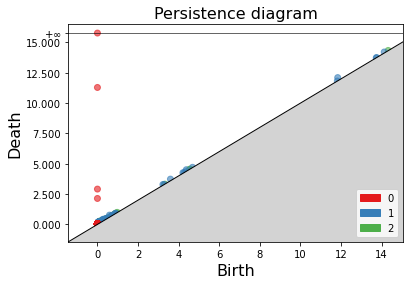

In [9]:
dgm=st.persistence()
gudhi.plot_persistence_diagram(dgm, legend = True)
plt.show()

In [ ]:
pickle.dump(skel,open("skelSort42.pkl","wb"))

In [19]:
def genAlphaSlider(dat,initial=.05,step=.25,maximum=20): #assume 3D for now
    ac = gudhi.AlphaComplex(dat)
    st = ac.create_simplex_tree()
    skel=list(st.get_skeleton(2))
    skel.sort(key=lambda s: s[1])
    points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
    lims=[[np.floor(np.min(dat[:,i])),np.ceil(np.max(dat[:,i]))] for i in range(3)]
    alpha = widgets.FloatSlider(
        value = initial,
        min = 0.0,
        max = maximum,
        step = step,
        description = 'Alpha:',
        readout_format = '.4f'
    )



    b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha.value])
    triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha.value])


    pts=go.Scatter3d(
        x = points[:, 0],
        y = points[:, 1],
        z = points[:, 2],
        mode='markers',
        marker=dict(
            size=2,
            color="cornflowerblue",                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=.9
        ),
        name='H0'

    )

    sfig=[pts]

    linepts={0:[],1:[],2:[]}
    for i in b1s:
        linepts[0].append(points[i[0],0])
        linepts[1].append(points[i[0],1])
        linepts[2].append(points[i[0],2])
        linepts[0].append(points[i[1],0])
        linepts[1].append(points[i[1],1])
        linepts[2].append(points[i[1],2])

        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)

    if len(linepts[0])>0:
        lins=go.Scatter3d(
            x=linepts[0],
            y=linepts[1],
            z=linepts[2],
            mode='lines',
            name='H1',
            marker=dict(
                size=3,
                color="#d55e00",                # set color to an array/list of desired values
                #colorscale='Viridis',   # choose a colorscale
                opacity=.9
            )
        )
        sfig.append(lins)
        if len(triangles)>0:
            mesh = go.Mesh3d(
                x = points[:, 0],
                y = points[:, 1],
                z = points[:, 2],
                i = triangles[:, 0],
                j = triangles[:, 1],
                k = triangles[:, 2],
                color="#009e73",
                opacity=.75,
                name='H2'
            )


            sfig.append(mesh)
    fig=go.Figure(sfig)
    fig.update_layout(width=800,height=800)
    #fig.show()




    def view_SC(alpha):
        if alpha==0:
            fig=go.Figure(sfig[0])
            fig.show()
        else:
            b1s=np.array([s[0] for s in skel if len(s[0]) == 2 and s[1] <= alpha])

            linepts={0:[],1:[],2:[]}
            for i in b1s:
                linepts[0].append(points[i[0],0])
                linepts[1].append(points[i[0],1])
                linepts[2].append(points[i[0],2])
                linepts[0].append(points[i[1],0])
                linepts[1].append(points[i[1],1])
                linepts[2].append(points[i[1],2])

                linepts[0].append(None)
                linepts[1].append(None)
                linepts[2].append(None)

            if len(linepts[0])>0:
                lins=go.Scatter3d(
                    x=linepts[0],
                    y=linepts[1],
                    z=linepts[2],
                    mode='lines',
                    name='H1',
                    marker=dict(
                        size=3,
                        color="#d55e00",                # set color to an array/list of desired values
                        #colorscale='Viridis',   # choose a colorscale
                        opacity=.85
                    )
                )
                if len(sfig)>1:
                    sfig[1]=lins
                else:
                    sfig.append(lins)
                triangles = np.array([s[0] for s in skel if len(s[0]) == 3 and s[1] <= alpha])
                if len(triangles)>0:
                    mesh = go.Mesh3d(
                        x = points[:, 0],
                        y = points[:, 1],
                        z = points[:, 2],
                        i = triangles[:, 0],
                        j = triangles[:, 1],
                        k = triangles[:, 2],
                        color="#009e73",
                        opacity=.5,
                        name='H2'
                    )

                    if len(sfig)>1:
                        sfig[2]=mesh
                    else:
                        sfig.append(mesh)


            fig=go.Figure(data=sfig,layout=go.Layout(width=800,height=800,
                                                     title=f"Simplicial complex with radius <= {round(float(alpha),5)}",
                                                    ))

            #fig.show()
            iplot(fig)


    widgets.interact(view_SC, alpha = alpha);
    return st

In [20]:
st=genAlphaSlider(dat) ### t=42

interactive(children=(FloatSlider(value=0.05, description='Alpha:', max=20.0, readout_format='.4f', step=0.25)…

In [21]:
dgm=st.persistence()


usetex mode requires TeX.


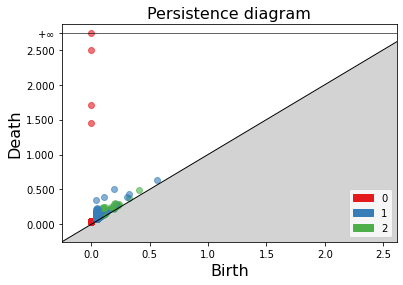

In [22]:
gudhi.plot_persistence_diagram(dgm, legend = True)
plt.show()

In [26]:
stF=genAlphaSlider(datF) ##t=50

interactive(children=(FloatSlider(value=0.05, description='Alpha:', max=20.0, readout_format='.4f', step=0.25)…

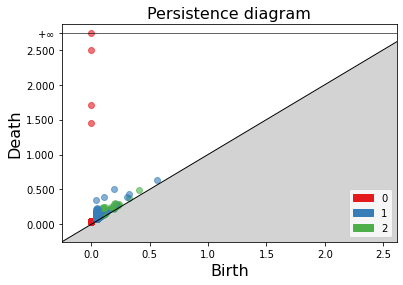

In [28]:
dgmF=st.persistence()##t=50
gudhi.plot_persistence_diagram(dgmF, legend = True)
plt.show()

In [ ]:
res=.05
maxRes=20
roundDig=5
resolutionPts=dict()


r=0

i=0
while r<=maxRes:
    #while ub<r+res:
    resolutionPts[r]={2:set(),3:set()}
    while i<len(skel) and skel[i][1]<r+res/2:
        resolutionPts[r][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    r=round(r+res,roundDig)
if i<len(skel):
    resolutionPts['max']={2:set(),3:set()}
    while i<len(skel):
        resolutionPts['max'][len(skel[i][0])].add(tuple(skel[j][0][k] for k in range(len(skel[j][0]))) for j in range(i,len(skel)))
        i+=1

In [ ]:
np.array(list(resolutionPts[1][3]))

In [ ]:
len(resolutionPts['max'][3])

In [ ]:
resolutionPts['max']

In [32]:
dat=np.load(open('Ptraj42.npy',"rb"))

ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()
skel=list(st.get_skeleton(2))
skel.sort(key=lambda s: s[1])
skel=skel[len(points):]
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
dat=points


res=.05
maxRes=20
roundDig=5
resolutionPts=dict()


cam=dict(eye=dict(x=.75, y=2, z=.25))
defaultLay=go.Layout(width=1000,height=1000,
                     title="Bead Distribution",scene_camera=cam
                                                 
                                            )


r=0

i=0
while r<=maxRes:
    #while ub<r+res:
    resolutionPts[r]={2:set(),3:set()}
    while i<len(skel) and skel[i][1]<r+res/2:
        resolutionPts[r][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    r=round(r+res,roundDig)
if i<len(skel):
    #resolutionPts['max']={tuple(skel[j][0][k] for k in range(len(skel[j][0]))) for j in range(i,len(skel))}
    resolutionPts['max']={2:set(),3:set()}
    while i<len(skel):
        resolutionPts['max'][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    
#for d in (2,3):
#    for r in resolutionPts[2].keys():
#        resolutionPts[d][r]=np.array(list(resolutionPts[r][d]))

for r in resolutionPts.keys():
    for d in (2,3):
        resolutionPts[r][d]=np.array(list(resolutionPts[r][d]))

pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)

sfig=[pts]
pfig=go.Figure(sfig,layout=go.Layout(width=1000,height=1000,
                     title="Bead Distribution"
                     ,scene_camera=cam                            
                                            ))

frames=[]


for r in np.arange(0,res+maxRes,res):
    r=round(r,roundDig)
    nfig=go.Figure(pfig)
    nfig.update_layout(width=1000,height=1000,title=f"Simplicial complex with radius <= {round(float(r)+.025,roundDig)}",
                      showlegend=False,scene_camera=cam)
    linepts={0:[],1:[],2:[]}
    for pnts in resolutionPts[r][2]:
        linepts[0].append(dat[pnts[0],0])
        linepts[1].append(dat[pnts[0],1])
        linepts[2].append(dat[pnts[0],2])
        linepts[0].append(dat[pnts[1],0])
        linepts[1].append(dat[pnts[1],1])
        linepts[2].append(dat[pnts[1],2])
        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)
    #triangles=resolutionPts[r][3]
    if len(resolutionPts[r][2])!=0:
        nfig.add_scatter3d(
                x=linepts[0],
                y=linepts[1],
                z=linepts[2],
                mode='lines',
                marker=dict(
                    size=3,
                    color="#d55e00",                # set color to an array/list of desired values
                    #colorscale='Viridis',   # choose a colorscale
                    opacity=.85
                )
                #name='H1', #have a feeling this may overwrite?
                
            )
    if len(resolutionPts[r][3])!=0:
            
        nfig.add_mesh3d(x = dat[:, 0],
                    y = dat[:, 1],
                    z = dat[:, 2],
                    i = resolutionPts[r][3][:, 0],
                    j = resolutionPts[r][3][:, 1],
                    k = resolutionPts[r][3][:, 2],
                    color="#009e73",
                    opacity=.5,
                    #name='H2'
            )
    frames.append(nfig)
    pfig=nfig
        
        

#fig = go.Figure(
#    data=pts,
#    layout=go.Layout(
#        title="Bead Distribution",
#        updatemenus=[dict(
#            type="buttons",
 #           buttons=[dict(label="Play",
 #                         method="animate",
#                          args=[None])])]),
#    frames=frames[:5])








In [ ]:
sfig=[pts]
pfig=go.Figure(sfig)


In [ ]:
pickle.dump(frames,open("nonOptFrames.pkl","wb"))

In [ ]:
len(frames)

In [ ]:
frames[399].show()

In [ ]:
frames[39].show()

In [ ]:
#!pip install kaleido

In [ ]:
#frames[39].update_layout( width=1000, height=1000,scene_camera=
#                        dict(
#                            eye=dict(x=.75, y=2, z=.25)))
frames[39].show()

In [ ]:

for i in range(len(frames)):
    #frames[i].update_layout( width=1000, height=1000,scene_camera=cam)
    frames[i].write_image(f"tmp/frame{i+1}.png")

In [ ]:
pts

In [ ]:
pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)
pfig=go.Figure([pts],layout=defaultLay)
pfig.write_image(f"tmp/frame0.png")

### Lets try to fix the figure clutter -> just append to data[1]-lines and data[2] -triangles

In [7]:
###clutterFix
##
#
#

dat=np.load(open('Ptraj42.npy',"rb"))

ac = gudhi.AlphaComplex(dat)
st = ac.create_simplex_tree()
skel=list(st.get_skeleton(2))
skel.sort(key=lambda s: s[1])
skel=skel[len(points):]
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
dat=points

res=.05
maxRes=20
roundDig=5
resolutionPts=dict()
cam=dict(eye=dict(x=.75, y=2, z=.25))
defaultLay=go.Layout(width=1000,height=1000,
                     title="Bead Distribution",scene_camera=cam
                                                 
                                            )


r=0

i=0
while r<=maxRes:
    #while ub<r+res:
    resolutionPts[r]={2:set(),3:set()}
    while i<len(skel) and skel[i][1]<r+res/2:
        resolutionPts[r][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    r=round(r+res,roundDig)
if i<len(skel):
    #resolutionPts['max']={tuple(skel[j][0][k] for k in range(len(skel[j][0]))) for j in range(i,len(skel))}
    resolutionPts['max']={2:set(),3:set()}
    while i<len(skel):
        resolutionPts['max'][len(skel[i][0])].add(tuple(skel[i][0][k] for k in range(len(skel[i][0]))))
        i+=1
    

##
## 
##
#for r in resolutionPts.keys():
#    for d in (2,3):
#        resolutionPts[r][d]=np.array(list(resolutionPts[r][d]))
##
"""
remember, resolutionPts[r][d] is a set of unique tuple pairs,
so we can efficiently regraph dim d in [2,3] if we union resolutionPts[:r+1][d] later 


Or if we can edit data[1] and just append resolutionPts[r][2] that will be the most efficient
"""


pts=go.Scatter3d(
    x = dat[:, 0],
    y = dat[:, 1],
    z = dat[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color="cornflowerblue",                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=.9
    ),
    name='H0'

)

sfig=[pts]
pfig=go.Figure(sfig)


frames=[]


found=[False,False]
linepts={0:[],1:[],2:[]}
tripts={0:[],1:[],2:[]}
for r in np.arange(0,res+maxRes,res):
    r=round(r,roundDig)
    nfig=go.Figure(pfig)
    nfig.update_layout(title=f"Simplicial complex with radius <= {round(float(r)+.025,roundDig)}",
                      showlegend=False)
    
    for pts in resolutionPts[r][2]:
        linepts[0].append(dat[pts[0],0])
        linepts[1].append(dat[pts[0],1])
        linepts[2].append(dat[pts[0],2])
        linepts[0].append(dat[pts[1],0])
        linepts[1].append(dat[pts[1],1])
        linepts[2].append(dat[pts[1],2])
        linepts[0].append(None)
        linepts[1].append(None)
        linepts[2].append(None)
    #triangles=resolutionPts[r][3]
    if len(resolutionPts[r][2])!=0:
        if not found[0]:
            nfig.data.append(go.Scatter3d(
                    x=linepts[0],
                    y=linepts[1],
                    z=linepts[2],
                    mode='lines',
                    marker=dict(
                        size=3,
                        color="#d55e00",                # set color to an array/list of desired values
                        #colorscale='Viridis',   # choose a colorscale
                        opacity=.85
                    )
                    #name='H1', #have a feeling this may overwrite?
                ))
            found[0]=True
        else:
            nfig.data[1]
    if len(resolutionPts[r][3])!=0:
            
            nfig.add_mesh3d(x = dat[:, 0],
                    y = dat[:, 1],
                    z = dat[:, 2],
                    i = resolutionPts[r][3][:, 0],
                    j = resolutionPts[r][3][:, 1],
                    k = resolutionPts[r][3][:, 2],
                    color="#009e73",
                    opacity=.5,
                    #name='H2'
                )
    frames.append(nfig)
    pfig=nfig
        
        

#fig = go.Figure(
#    data=pts,
#    layout=go.Layout(
#        title="Bead Distribution",
#        updatemenus=[dict(
#            type="buttons",
 #           buttons=[dict(label="Play",
 #                         method="animate",
#                          args=[None])])]),
#    frames=frames[:5])









FileNotFoundError: [Errno 2] No such file or directory: 'Ptraj42.npy'

In [ ]:
resolutionPts[.5][3]

In [ ]:
resolutionPts